# Model analysis

After having done experimentations with training set and cross validation, to find the best model posible with the data, it's time to confront our "winner" model with our testing data, and see how usefull and efective said model is. This document is oriented to that analysis

In [1]:
import os

os.getcwd()

'/home/stefano/Dropbox/Aprendizaje util/Programacion learning/modulo machine learning/Python - scikit-learn datascience library'

### Data load

In [4]:
import pandas as pd
datapath = 'C:\\Users\\stefano\\Dropbox\\Aprendizaje util\\Programacion learning\\modulo machine learning\\python\\winequality.csv' 
# place here the path of the file you are loading, if you have it on your local computer

datapath2 = '/home/stefano/Dropbox/Aprendizaje util/Programacion learning/modulo machine learning/python/ejercicios terminados/winequality.csv'
winedata = pd.read_csv(datapath2,sep = ';') # make sure to check the separator for your case

winedata.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,color
0,5.20,0.34,0.00,1.8,0.050,27.0,63.0,0.99160,3.68,0.79,14.0,6,red
1,6.20,0.55,0.45,12.0,0.049,27.0,186.0,0.99740,3.17,0.50,9.3,6,white
2,7.15,0.17,0.24,9.6,0.119,56.0,178.0,0.99578,3.15,0.44,10.2,6,white
3,6.70,0.64,0.23,2.1,0.080,11.0,119.0,0.99538,3.36,0.70,10.9,5,red
4,7.60,0.23,0.34,1.6,0.043,24.0,129.0,0.99305,3.12,0.70,10.4,5,white


### Categorical data transformation

In [6]:
def categoricaltonum(dataset,category,mapdictionary):
    'this function transforms categorial variable of a dataset into numerical one, we specify as \
    arguments the dataset, the category we want to transform, and we use a dictionary to specify\
    which category will correspond to what created number afterwards'
    
    dataset[category] = dataset[category].map(mapdictionary)
    return(dataset)


categoricaltonum(winedata,"color",{'red': 1, 'white': 0})

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,color
0,5.20,0.340,0.00,1.80,0.050,27.0,63.0,0.99160,3.68,0.79,14.0,6,1
1,6.20,0.550,0.45,12.00,0.049,27.0,186.0,0.99740,3.17,0.50,9.3,6,0
2,7.15,0.170,0.24,9.60,0.119,56.0,178.0,0.99578,3.15,0.44,10.2,6,0
3,6.70,0.640,0.23,2.10,0.080,11.0,119.0,0.99538,3.36,0.70,10.9,5,1
4,7.60,0.230,0.34,1.60,0.043,24.0,129.0,0.99305,3.12,0.70,10.4,5,0
5,5.70,0.220,0.20,16.00,0.044,41.0,113.0,0.99862,3.22,0.46,8.9,6,0
6,7.10,0.470,0.29,14.80,0.024,22.0,142.0,0.99518,3.12,0.48,12.0,8,0
7,9.70,0.310,0.47,1.60,0.062,13.0,33.0,0.99830,3.27,0.66,10.0,6,1
8,7.60,0.210,0.44,1.90,0.036,10.0,119.0,0.99130,3.01,0.70,12.8,6,0
9,5.80,0.320,0.28,4.30,0.032,46.0,115.0,0.98946,3.16,0.57,13.0,8,0


### Separating data in test and training set 

In [8]:
from sklearn.model_selection import train_test_split 

from sklearn.model_selection import StratifiedShuffleSplit
# I we care about percentage of answers 
split = StratifiedShuffleSplit(n_splits=1, test_size=0.2, random_state=42)

# We specify the dataset, and the variable that we want to take in consideration when splitting 
for train_index, test_index in split.split(winedata, winedata["color"]):
    train = winedata.iloc[train_index]
    test = winedata.iloc[test_index]
    


### We create a features only dataframe, and a target dataframe

In [9]:
train_features = train.drop("color", axis = 1)

train_target = train["color"]


,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
2027,8.1,0.12,0.38,0.9,0.034,36.0,86.0,0.99026,2.80,0.55,12.0,6
815,7.5,0.31,0.41,2.4,0.065,34.0,60.0,0.99492,3.34,0.85,11.4,6
135,4.8,0.17,0.28,2.9,0.030,22.0,111.0,0.99020,3.38,0.34,11.3,7
2425,7.4,0.19,0.30,12.8,0.053,48.5,229.0,0.99860,3.14,0.49,9.1,7
3785,6.9,0.32,0.15,8.1,0.046,51.0,180.0,0.99580,3.13,0.45,8.9,5


In [14]:


from sklearn.preprocessing import StandardScaler  
from sklearn.pipeline import Pipeline
from sklearn.linear_model import LogisticRegression 
from sklearn.model_selection import GridSearchCV

In [15]:
basic_reg_log = Pipeline(steps = [("estandarizador" , StandardScaler()),("regresioncita_logistica",
                                                                                             LogisticRegression())])

gs_basic_reg_log = GridSearchCV(estimator = basic_reg_log ,param_grid = {}, scoring = "f1", cv = 10,verbose = 3, n_jobs = -1)

In [16]:
def modelstudy(featuredata, targetdata, estimatorofchoice):
    estimatorofchoice.fit(featuredata, targetdata)
    
    
    return({"bestie_score" : estimatorofchoice.best_score_ ,"bestestimator" :estimatorofchoice.best_estimator_ })

bestestimator = modelstudy(train_features ,train_target,gs_basic_reg_log)

Fitting 10 folds for each of 1 candidates, totalling 10 fits
[CV]  ................................................................
[CV]  ................................................................
[CV]  ................................................................
[CV]  ................................................................
[CV] ................................. , score=0.984375, total=   0.0s
[CV] ................................. , score=0.984375, total=   0.0s
[CV] ................................. , score=0.984375, total=   0.0s
[CV]  ................................................................
[CV]  ................................................................
[CV]  ................................................................
[CV] ....................... , score=0.9883268482490272, total=   0.1s
[CV]  ................................................................
[CV] ....................... , score=0.9842519685039369, total=   0.1s
[CV]  ..........

[Parallel(n_jobs=-1)]: Done   3 out of  10 | elapsed:    0.1s remaining:    0.3s
[Parallel(n_jobs=-1)]: Done   7 out of  10 | elapsed:    0.3s remaining:    0.1s


[CV]  ................................................................
[CV] ....................... , score=0.9881422924901185, total=   0.0s


[Parallel(n_jobs=-1)]: Done  10 out of  10 | elapsed:    0.4s finished


In [18]:
bestestimator

{'bestie_score': 0.9863088539367194, 'bestestimator': Pipeline(memory=None,
      steps=[('estandarizador', StandardScaler(copy=True, with_mean=True, with_std=True)), ('regresioncita_logistica', LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
           intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
           penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
           verbose=0, warm_start=False))])}

In [21]:
best_model = bestestimator["bestestimator"]

## Model analysis 

### Confronting the test set 

In [23]:
testwinedata_features = test.drop("color",axis = 1)

testwinedata_target = test["color"]

In [24]:
from sklearn.metrics import f1_score  # we confront the model with the test set

y_true = testwinedata_target # first we specify the results of the test set, the target variable that we want to see if we can predict
y_pred = best_model.predict(testwinedata_features) # we order the model to predict the target, with its features.
scorefinal = f1_score(y_true, y_pred, average='macro')   # Calculate the score . by comparing the result of the prediction with the real values
scorefinal

0.9917091836734694

### Plotting the standarized residue

In [25]:
import numpy as np
import pandas as pd

# Here we calculate, the standarized residuals and specify them on a numpy array

residual = y_pred - y_true 
stsdofpredY = np.array(y_pred).std()
standardresidual = (y_true-y_pred)/ stsdofpredY   # this calculates the standarized residuals.
print(standardresidual)

1359    0.000000
5330    0.000000
2658    0.000000
6482    0.000000
1503    0.000000
3033    0.000000
1798    0.000000
2455    0.000000
4816    0.000000
2897    0.000000
1242    0.000000
3337    0.000000
6476    0.000000
4126    0.000000
4095    0.000000
2399    0.000000
879     0.000000
6449    0.000000
1960    0.000000
3261    0.000000
2517    0.000000
3486    0.000000
6062    0.000000
5093    0.000000
645     0.000000
469     2.321429
1265    0.000000
4539    0.000000
1063    0.000000
677     0.000000
          ...   
530     0.000000
3053    0.000000
6067    0.000000
684     0.000000
3496    0.000000
2771    0.000000
5781    0.000000
4894    0.000000
3472    0.000000
5527    0.000000
254     0.000000
3521    0.000000
3671    0.000000
1575    0.000000
1271    0.000000
1535    0.000000
3593    0.000000
861     0.000000
801     0.000000
282     0.000000
65      0.000000
145     0.000000
1401    0.000000
5388    0.000000
1077    0.000000
1343    0.000000
5132    0.000000
5700    0.0000

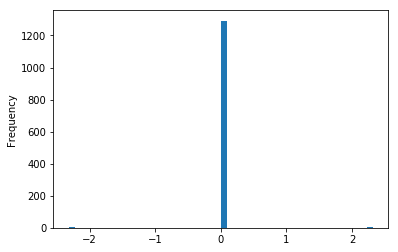

In [28]:
# Representation of residues on histogram
import matplotlib
from matplotlib import pyplot as plt

standardresidual.plot(kind = 'hist', bins = 50)

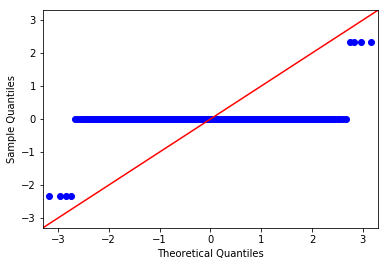

In [27]:
# Representation of residues on qqplot 

import numpy as np
import statsmodels.api as sm
import pylab

sm.qqplot(standardresidual, line='45')
pylab.show()

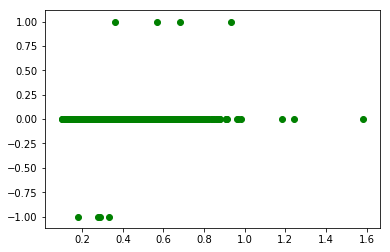

In [29]:
plt.scatter(testwinedata_features["volatile acidity"],residual, label ="residual scatterplot for xvariable" , color = "green" )

### Confusion matrix 

In [30]:
from sklearn.metrics import confusion_matrix

matriz_confusion = confusion_matrix(y_true = y_true,
                                    y_pred = y_pred
                                   )

matriz_confusion

array([[976,   4],
       [  4, 316]])

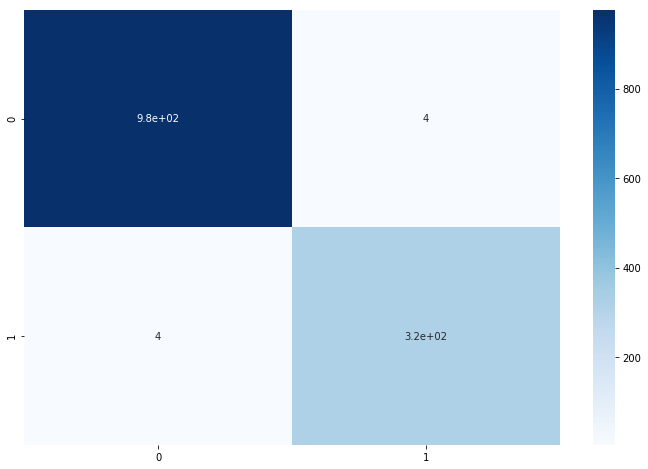

In [33]:
import seaborn as sns
plt.figure(figsize=(12,8))
sns.heatmap(matriz_confusion,                     
            annot=True,                     
            cmap="Blues")
pass